In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:

runs = {'control' :                    './models/filterFrance/Z64/yrs100/control/'
        #,'0.01 weight ZG' :            './models/filterFrance/Z64/yrs100/fw2..01.2/'
        #,'0 weight ZG' :               './models/filterFrance/Z64/yrs100/fw2.0.2/'              
        #,'0.1 weight ZG' :             './models/filterFrance/Z64/yrs100/fw2..1.2/'
        #,'20 weight TM SM' :            './models/filterFrance/Z64/yrs100/fw20.1.20/'
        #,'0.5 K-L and 0.5 rec':         './models/filterFrance/Z64/yrs100/k.5.5/'
        #,'4 layers':                   './models/filterFrance/Z64/yrs100/lrs4/'
        #,'0.01 K-L and 0.99 rec' :     './models/filterFrance/Z64/yrs100/k.99.01/'
        #,'2 skip' :                    './models/filterFrance/Z64/yrs100/skip2/'
        #,'no dropout/btchnorm' :       './models/filterFrance/Z64/yrs100/nodrpbnrml/'
        #,'decoder without mask' :      './models/filterFrance/Z64/yrs100/nomask/'
        #,'no filters' :                './models/nofilter/Z64/yrs100/nomask/'
        #,'Z8'   :                       './models/filterFrance/Z8/yrs100/control/'
        #,'Z8/0.1 weight ZG' :          './models/filterFrance/Z8/yrs100/fw2..1.2/'     
        #,'Z8/20 weight TM SM' :         './models/filterFrance/Z8/yrs100/fw20.1.20/'
        #,'Z2' :                        './models/filterFrance/Z2/yrs100/control/'
        #,'Z2/0.1 weight ZG' :          './models/filterFrance/Z2/yrs100/fw2..1.2/'
        #,'Z8/ 800 yrs/ control' :      './models/filterFrance/Z8/yrs800/control/'
        #,'Z8/800 yrs/0.1 weight ZG' :  './models/filterFrance/Z8/yrs800/fw20.1.20/'
        #,'500 yrs/ control' :           './models/filterFrance/Z64/yrs500/control/'
        ,'500 yrs/ 20 wght TMSM' :   './models/filterFrance/Z64/yrs500/fw20.1.20/'
        ,'500 yrs/Z8' :                 './models/filterFrance/Z8/yrs500/control/'
        ,'500 yrs/Z8/20 wght TMSM' : './models/filterFrance/Z8/yrs500/fw20.1.20/'
        ,'500 yrs/Z8/4 layers'  :      './models/filterFrance/Z8/yrs500/fw20.1.20lrs4/'
        ,'500 yrs/Z8/0 weight TM SM' :  './models/filterFrance/Z8/yrs500/fw0.1.0/'
        ,'500 yrs/Z8/20wgtTMSMbtch1024':'./models/filterFrance/Z8/yrs500/fw20.1.20btch1024/'
        ,'500 yrs/Z8/20wgtTMSMskip2' :  './models/filterFrance/Z8/yrs500/fw20.1.20skip2/'
        ,'500 yrs/Z8/40 wght TMSM' :     './models/filterFrance/Z8/yrs500/fw40.1.40/'
        ,'500 yrs/Z4/20wghtTMSMbtch256' : './models/filterFrance/Z4/yrs500/fw20.1.20btch256/'
        ,'500 yrs/Z4/0wghtTMSMbtch256' : './models/filterFrance/Z4/yrs500/fw0.1.0btch256/'
        ,'500 yrs/0wghtTMSMbtch256' : './models/filterFrance/Z64/yrs500/fw0.1.0btch256/'
        ,'500 yrs/40wghtTMSMbtch256' : './models/filterFrance/Z64/yrs500/fw40.1.40lrs4btch256/'
        ,'500 yrs/nomaskfw40.1.40btch256' : './models/nofilter/Z64/yrs500/nomaskfw40.1.40btch256/'
        ,'NAonlyfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20btch256/'
        ,'Z8/NAonlyfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256/'
        ,'Z8/NAonlyfw20.1.20btch256out.1' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256in1out.1/'
}

In [3]:
runs = {'control' :                    './models/filterFrance/Z64/yrs100/control/'
        ,'0 weight ZG' :               './models/filterFrance/Z64/yrs100/fw2.0.2/'
        ,'20 weight TM SM' :            './models/filterFrance/Z64/yrs100/fw20.1.20/'
        ,'Z8'   :                       './models/filterFrance/Z8/yrs100/control/'
        ,'Z8/20 weight TM SM' :         './models/filterFrance/Z8/yrs100/fw20.1.20/'
        ,'NAonlyfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20btch256/'
        ,'Z8/NAonlyfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256/'
        ,'Z8/NAonlyfw20.1.20btch256out.1' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256in1out.1/'
        }


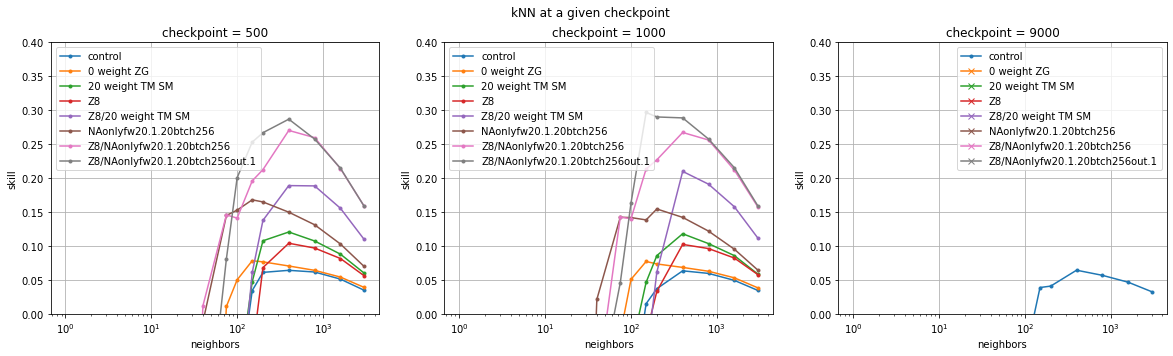

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [4]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('kNN at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)

for i, checkpoint in enumerate([500,1000,9000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in runs.items():
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        if checkpoint in score.checkpoint.values:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2))
            maxiter=100
            #ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
            ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
        else:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(10, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            ax1.plot(meanskillvsckpt.index[:maxiter],np.inf*meanskillvsckpt.values[:maxiter],label=name, marker='x')
    ax1.set_xlabel('neighbors')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.4])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best')
    ax1.grid(True)
fig.savefig('./Images/class_KNN.png',dpi=200)

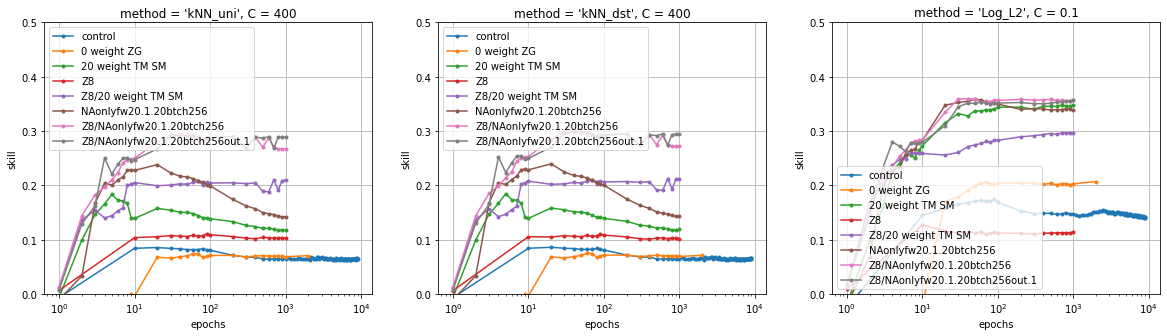

In [5]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('')

axs = fig.subplots(nrows=1, ncols=3)

for i, (C, method) in enumerate(zip([400,400,0.1],['kNN_uni','kNN_dst','Log_L2'])):
    ax1 = axs[i]
    for name, folder in runs.items():
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(slice(None), C, method), 'skill'].droplevel(level=(1,2)) # The last command gets rid of C and method in the output
        stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(slice(None), C, method), 'skill'].droplevel(level=(1,2))
        maxiter=100
        #ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
        ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.5])
    ax1.set_xscale("log")
    ax1.set_title(f"{method = }, {C = }")
    ax1.legend(loc='best')
    ax1.grid(True)
    fig.savefig('./Images/class_epochs.png',dpi=200)

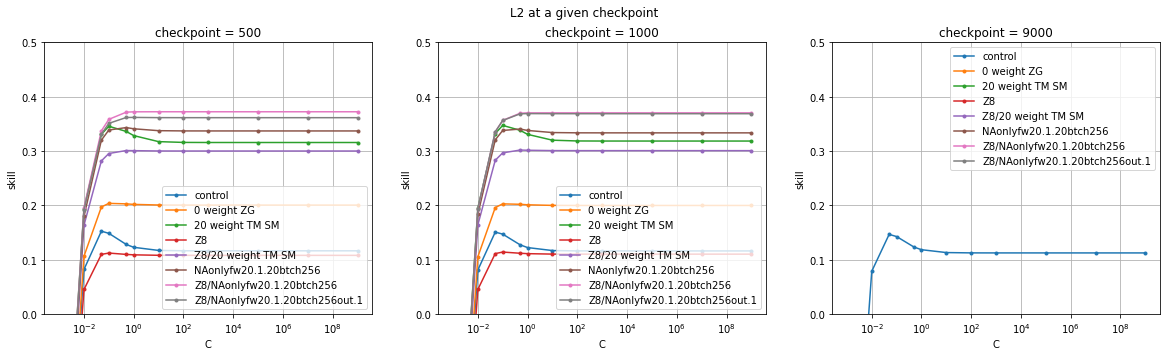

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [6]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('L2 at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)

for i, checkpoint in enumerate([500,1000,9000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in runs.items():
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        if checkpoint in score.checkpoint.values:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2))
            maxiter=100
            #ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
            ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
        else:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(10, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            ax1.plot(meanskillvsckpt.index[:maxiter],np.inf*meanskillvsckpt.values[:maxiter],label=name, marker='.')
    ax1.set_xlabel('C')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.5])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best')
    ax1.grid(True)
fig.savefig('./Images/class_L2.png',dpi=200)